In [35]:
import pandas as pd

In [36]:
df=pd.read_csv('Titanic-Dataset.csv')
print(df.head())                                #know the data schema along with the first 10 values

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [37]:
print(df.info())                      #  to know the schema

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [38]:
print(df.isnull().sum())                #how many with no value in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [39]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [40]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [41]:
df['Sex']=df['Sex'].map({'female':0,'male':1})

In [42]:
print(df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [43]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [45]:
#Normalization: When you need features in a specific range (0–1), like for Neural Networks.
#Standardization: When you need to handle outliers or Gaussian assumptions.

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [47]:
scaler_1=StandardScaler()
df1=df.copy()
df1[['Age','Fare']]=scaler_1.fit_transform(df[['Age','Fare']])
print(df1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    1 -0.565736      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                               Heikkinen, Miss. Laina    0 -0.258337      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                             Allen, Mr. William Henry    1  0.433312      0   
..                                                 ...  ...    

In [50]:
scaler_2=MinMaxScaler()
df2=df.copy()
df2[['Age','Fare']]=scaler_2.fit_transform(df2[['Age','Fare']])

print(df2)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  0.271174      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.472229      1   
2                               Heikkinen, Miss. Laina    0  0.321438      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.434531      1   
4                             Allen, Mr. William Henry    1  0.434531      0   
..                                                 ...  ...    

In [51]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False        True  
1          PC 17599  71.2833   C85       False       False  
2  STON/O2. 3101282   7.9250   NaN       False        True  
3            113803  53.1000  C123       False      

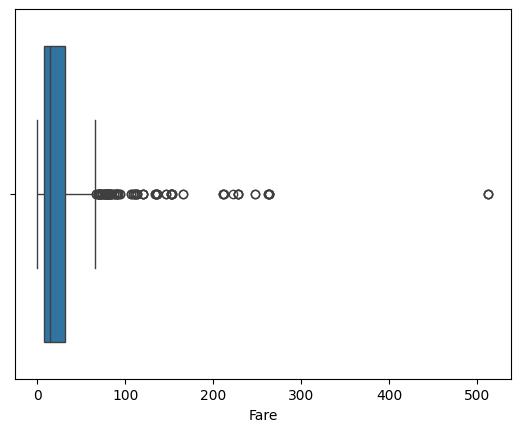

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Fare'])
plt.show()
